In [2]:
# !pip install python-Levenshtein

In [3]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
def clean_pos_col(df):
    # Cleaning using fuzz library 
    positions = df['Position'].unique()
    standardized_positions = {}
    for position in positions:
        if position in standardized_positions:
            continue
        matches = process.extract(position, positions, scorer=fuzz.token_sort_ratio, limit=None)
        best_match, score = max(matches, key=lambda x: x[1])
        if score >= 80:
            standardized_positions[position] = best_match
            for synonym in matches:
                if synonym[1] >= 80:
                    standardized_positions[synonym[0]] = best_match
        else:
            standardized_positions[position] = position
    df['Position'] = df['Position'].map(standardized_positions)
    #Cleaning Manually 
    for i, row in df.iterrows():
        print(row['Position'])
        if row['Position'] in ['qa engineer' , 'qa lead' , 'qa manager' , 'working student(qa)']:
            df.at[i,'Position'] = 'qa'
        if row['Position'] in ['ну или software engineer']:
            df.at[i,'Position'] = 'software engineer'
        if row['Position'] in ['software developer in test']:
            df.at[i,'Position'] = 'software tester'
        if row['Position'] in ['lead software developer']:
            df.at[i,'Position'] = 'software developer'
        if row['Position'] in ['senior data engineer' , 'data science manager' , 'data science manager' , 'analyst']:
            df.at[i,'Position'] = 'data engineer'
        if row['Position'] in ['systemadministrator']:
            df.at[i,'Position'] = 'system administrator'
    df  = df[df['Position'] !='nan']
    return df

In [5]:
df1 = []
df = data_pre(df1)
df = df.apply(lambda x: x.astype(str).str.lower())
df['Position'].value_counts()

['Startup' 'Product' nan 'Consulting / Agency' 'Bodyshop / Outsource'
 'University' 'Bank' 'Outsource']


Position
backend developer         427
software engineer         394
data scientist            232
frontend developer        157
devops                    110
                         ... 
tech lead / full-stack      1
technical lead              1
architect                   1
hiwi                        1
desktop                     1
Name: count, Length: 167, dtype: int64

In [6]:
df = clean_pos_col(df)

software engineer
backend developer
software engineer
frontend developer
backend developer
devops
frontend developer
frontend developer
backend developer
software engineer
data engineer
software engineer
software engineer
software engineer
designer (ui/ux)
backend developer
backend developer
product manager
backend developer
mobile developer
devops
software architect
software engineer
backend developer
software engineer
team lead
devops
test manager
devops
product manager
software engineer
backend developer
qa engineer
software engineer
software engineer
data scientist
designer (ui/ux)
software engineer
backend developer
devops
frontend developer
software engineer
frontend developer
software engineer
software engineer
software engineer
designer (ui/ux)
backend developer
backend developer
software engineer
backend developer
designer (ui/ux)
qa engineer
backend developer
backend developer
software engineer
software engineer
devops
software engineer
software engineer
software engineer
bac

In [7]:
# select top 23 frequent positions 
pos_list = df['Position'].value_counts().iloc[:23].index.tolist()
df = df[df['Position'].isin(pos_list)]

In [8]:
def clean_senior_col(df):
    meaninigless_values = ['nan','student','working student','no idea, there are no ranges in the firm','no level','no level ']
    df = df[~df['Seniority'].isin(meaninigless_values)]
    return df

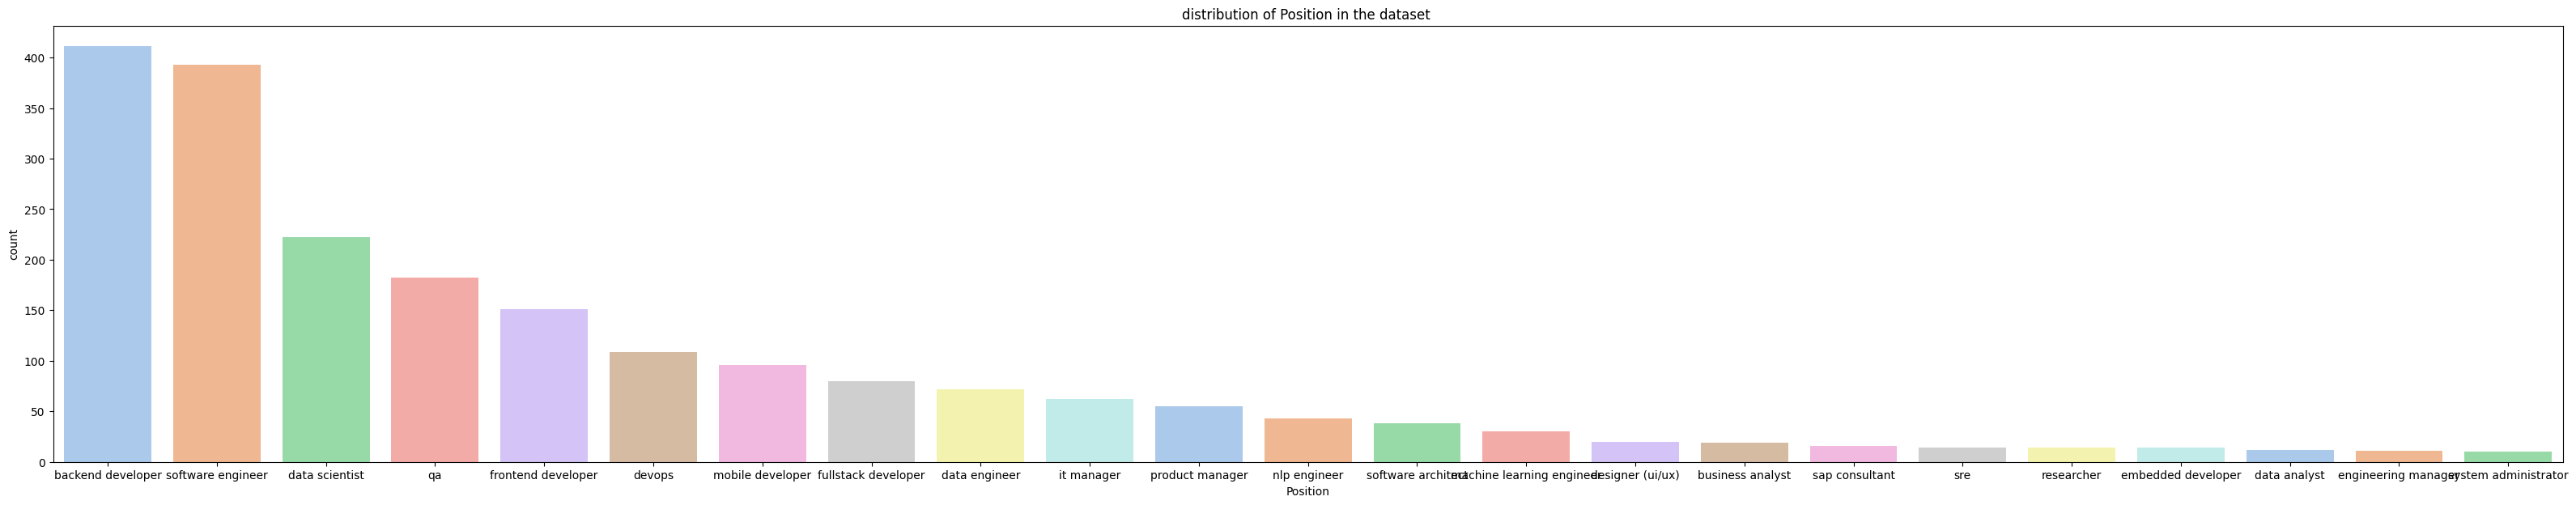

In [9]:
######################################### Draw histogram for positions in the dataset ############################
import matplotlib.pyplot as plt
# create a histogram
plt.figure(figsize=(40,7))
sns.countplot(x = 'Position', data = df, palette = 'pastel',order=df['Position'].value_counts().index)
plt.title('distribution of Position in the dataset ')
plt.show()

In [10]:
################################ Precentage for each position #######################################3

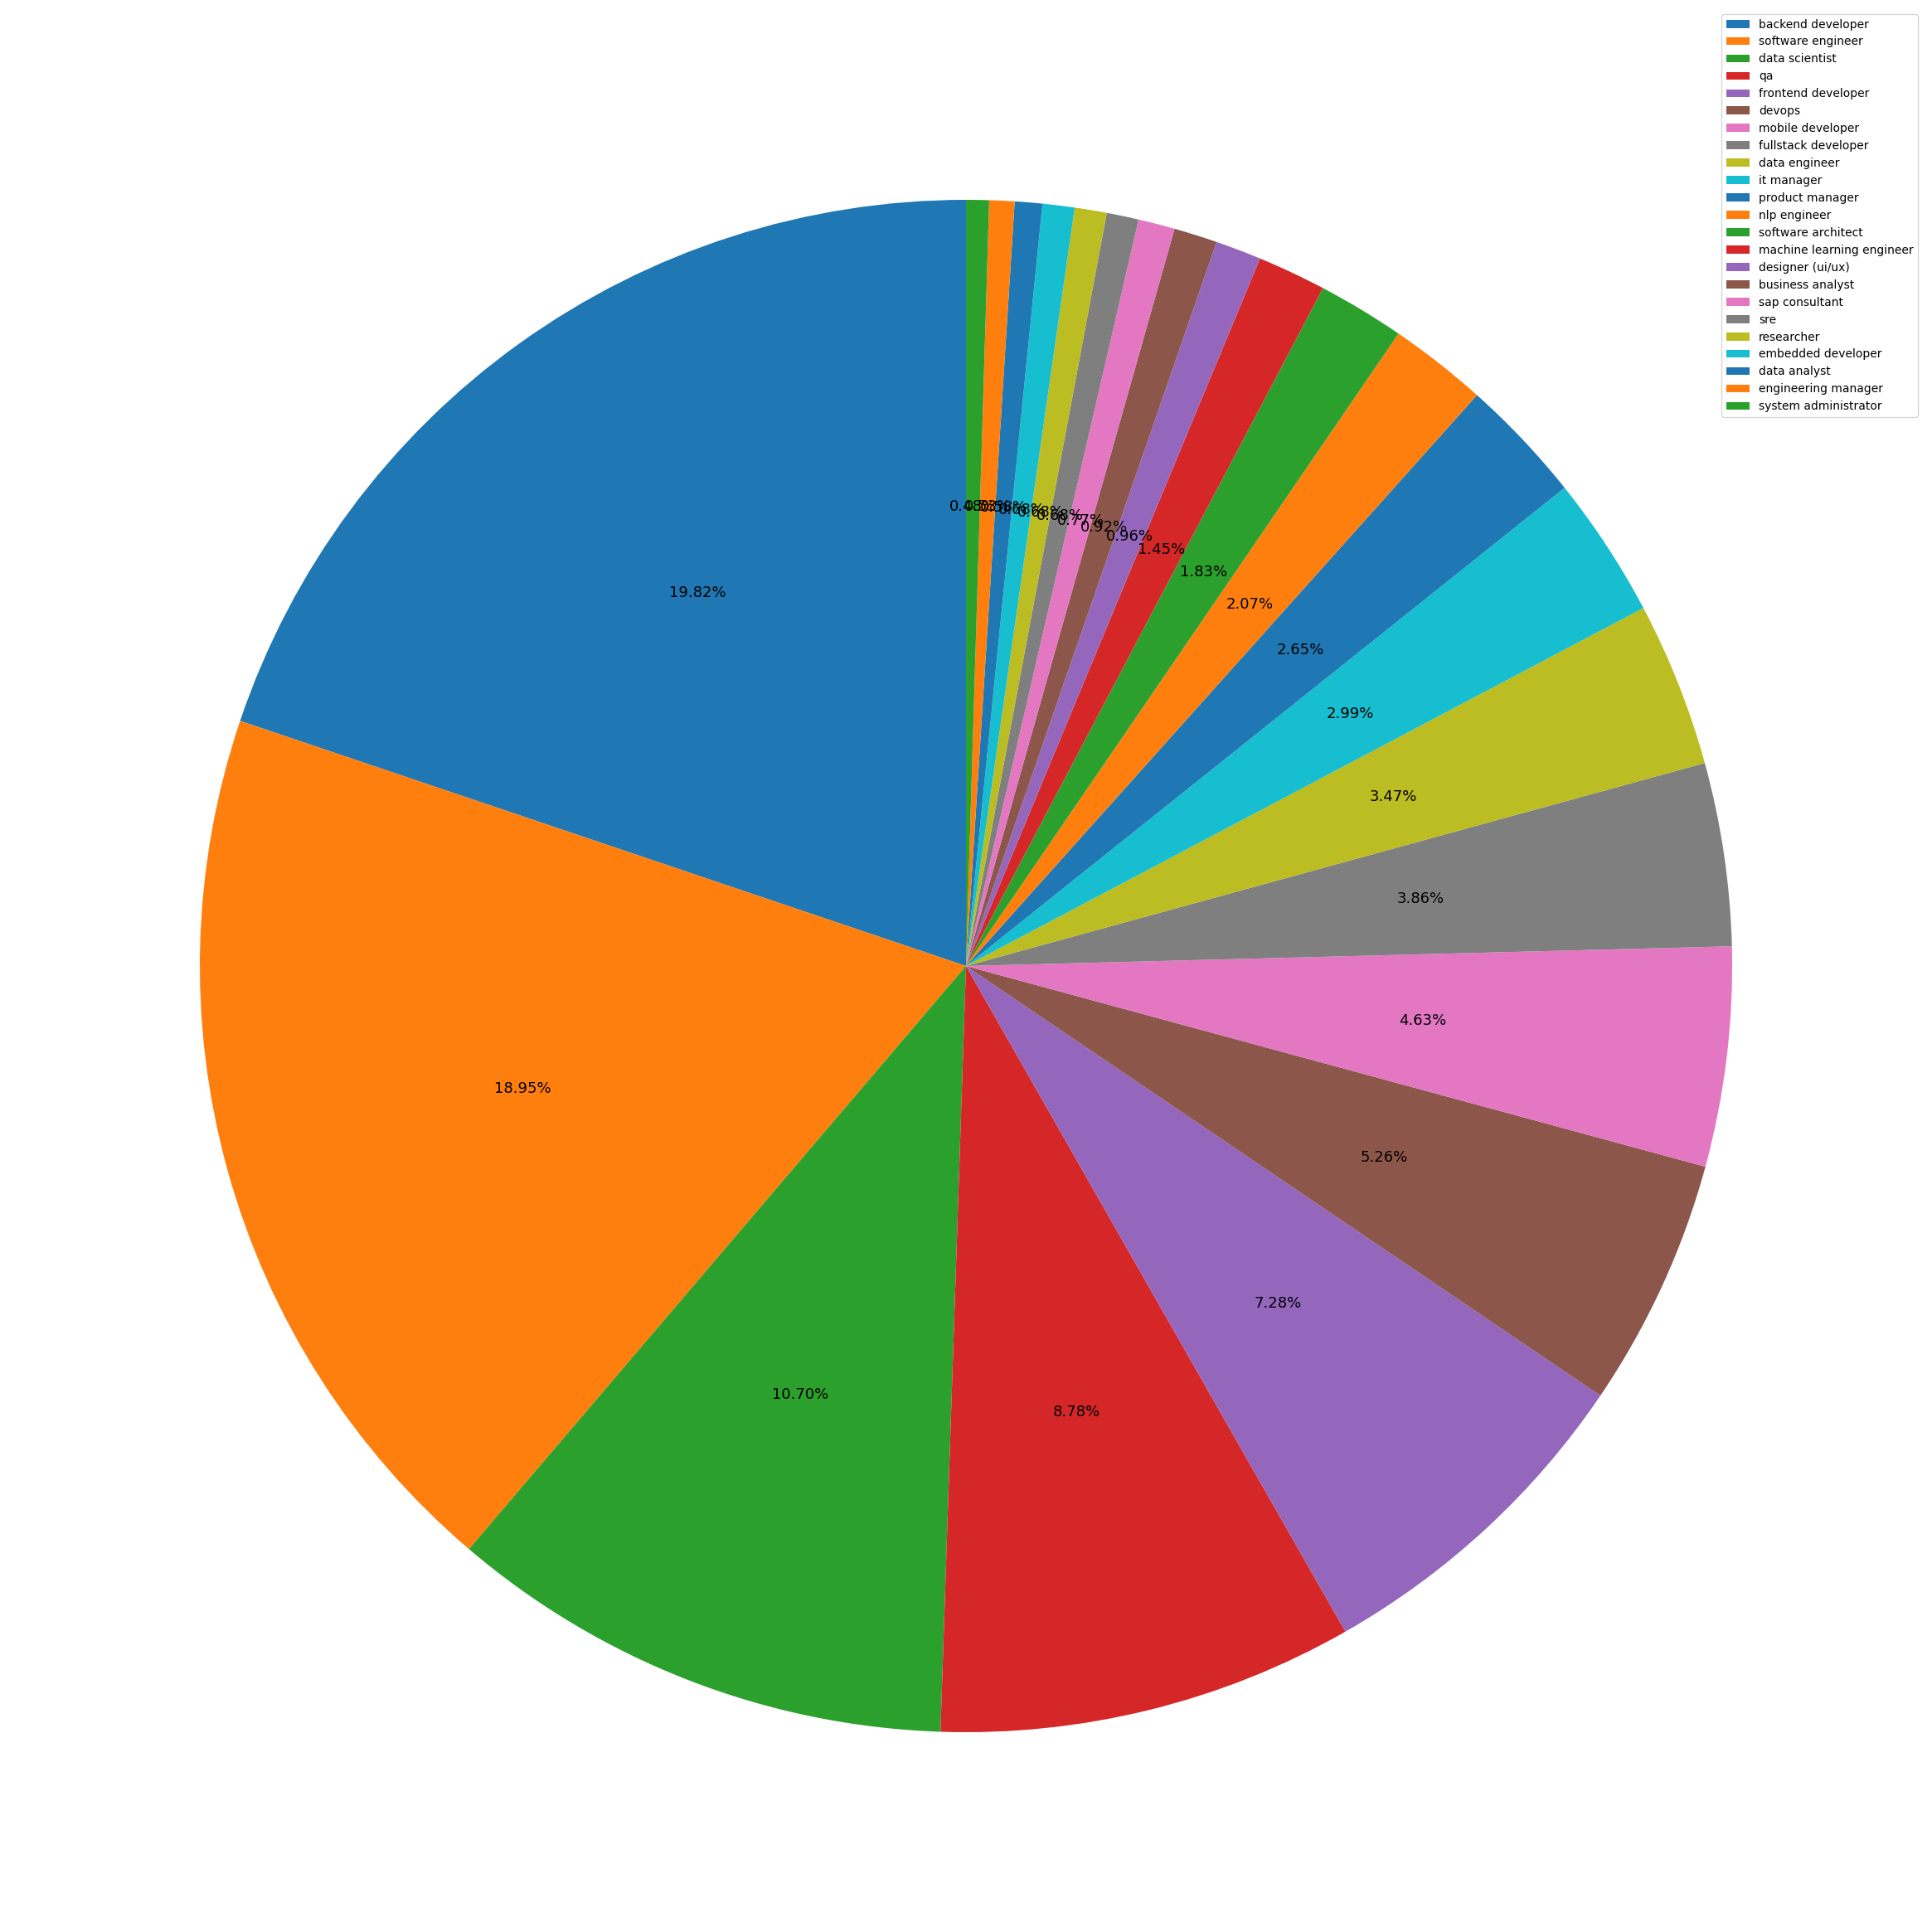

In [11]:
plt.figure(figsize=(30,30))
df['Position'].value_counts().iloc[:23].plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*23)
plt.ylabel("")
plt.legend(loc='upper right',labels=df['Position'].value_counts().iloc[:23].index)
plt.show()

#### Comments
1. It seems that the most frequent position in the data is backend developer(21%),sofware engineer(19%) and data scientist (10%) the least one is administrator 

In [12]:
######################## END OF EXPLORING POSITIONS #######################

In [13]:
print(df['City'].value_counts().index.tolist())

['berlin', 'munich', 'amsterdam', 'frankfurt', 'hamburg', 'stuttgart', 'cologne', 'moscow', 'düsseldorf', 'kyiv', 'london', 'zurich', 'nuremberg', 'karlsruhe', 'prague', 'warsaw', 'stuttgart ', 'stockholm', 'heidelberg', 'eindhoven', 'paris', 'tallinn', 'darmstadt', 'helsinki', 'hannover', 'vienna', 'wolfsburg', 'bonn', 'milan', 'wroclaw', 'mannheim', 'leipzig', 'düsseldorf ', 'ingolstadt', 'dusseldorf', 'nürnberg', 'walldorf', 'siegen', 'minsk', 'regensburg', 'barcelona', 'schleswig-holstein', 'lisbon', 'dublin', 'koblenz', 'bielefeld', 'krakow', 'saint-petersburg', 'zug', 'saint petersburg', 'rotterdam', 'rome', 'madrid', 'dresden', 'boeblingen', 'rosenheim', 'utrecht', 'kiev', 'bodensee', 'brussels', 'karlsruhe ', 'cork', 'odesa', 'marburg', 'kassel ', 'pforzheim', 'toulouse', 'freiburg', 'bern', 'riga', 'ma', 'saarbrücken', 'samara', 'ingolstadt ', 'riga, latvia', 'aachen', 'sevilla', 'jyvaskyla', 'lugano', 'dubai', 'limassol', 'nizhny novgorod ', 'lausanne', 'bremen', 'würzburg ',

In [14]:
# Explore distribution of City
# get top 12 Cities (their value_counts >= 34)
print(df['City'].value_counts().iloc[:6])

City
berlin       1039
munich        440
amsterdam      85
frankfurt      83
hamburg        68
stuttgart      34
Name: count, dtype: int64


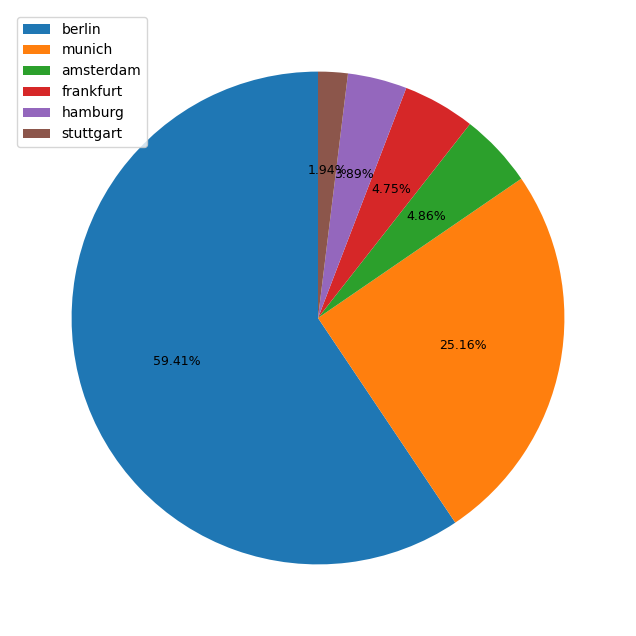

In [15]:
# Top 5 City on the survey 
plt.figure(figsize=(8,8))
df['City'].value_counts().iloc[:6].plot.pie(autopct="%1.2f%%",fontsize=9,startangle=90,labels=['']*6)
plt.ylabel("")
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:6].index)
plt.show()

In [16]:
# get the top 6 cities 
# city_remain_values = ['berlin','munich','frankfurt','amsterdam','hamburg','stuttgart','cologne','moscow','düsseldorf','kyiv','london']
city_remain_values = ['berlin','munich','frankfurt','amsterdam','hamburg','stuttgart']
df =df.loc[df['City'].isin(city_remain_values)]

#### Comment:
1. it seems that the most frequent city is Berlin then the cities frequency is ordered as follow Munich,Frankfurt,Amsterdam,Hamburg,Stuttgart.

In [17]:
######################## END OF EXPLORING Cities #######################

In [18]:
####################### Start Exploring Salary ##########################

In [19]:
####################### Salary Cleaning ##################################
# Detect nans in Salary 
print(df[df['Salary'] == 'nan'])
# as there is only one row with nan value we can drop it 
df = df[df['Salary'] != 'nan']

               Timestamp  Age Gender     City           Position   
475  04.12.2019 19:19:26  nan   male  hamburg  backend developer  \

    Experience_Years Seniority Main_Tech Salary Salary_Bonus Last_Year_Salary   
475               18    junior    python    nan          nan              nan  \

    Last_Year_Salary_Bonus Vacations Contract_Duration Main_Language_Work   
475                    nan       nan         unlimited            english  \

    Company_Size Company_Type  
475        1000+      product  


In [20]:
#  Get some statistical analysis about the Salary 
import numpy as np
import statistics as stats

df_salary = df.copy()



df_salary_mean = df.copy()
df_salary_median = df.copy()
df_salary_mode = df.copy()
df_salary_max = df.copy()
df_salary_min = df.copy()

df_salary_mean['Salary'] = df_salary_mean['Salary'].astype(float)
df_salary_median['Salary'] = df_salary_median['Salary'].astype(float)
df_salary_mode['Salary'] = df_salary_mode['Salary'].astype(float)
df_salary_max['Salary'] = df_salary_max['Salary'].astype(float)
df_salary_min['Salary'] = df_salary_min['Salary'].astype(float)

mean_salary = df_salary_mean['Salary'].mean()
median_salary = df_salary_median['Salary'].median()
mode_salary = df_salary_mode['Salary'].mode()[0]
max_salary = max(df_salary_max['Salary'])
min_salary = min(df_salary_min['Salary'])

# print table 
cal_salary = {'statistic':['mean','median','mode','max','min'],'value':[mean_salary,median_salary,mode_salary,max_salary,min_salary]}
table = pd.DataFrame(cal_salary)
table_str = table.to_string(index=False, justify='center')
print(table_str)

statistic      value   
    mean   73765.974828
  median   70000.000000
    mode   70000.000000
     max  850000.000000
     min   10001.000000


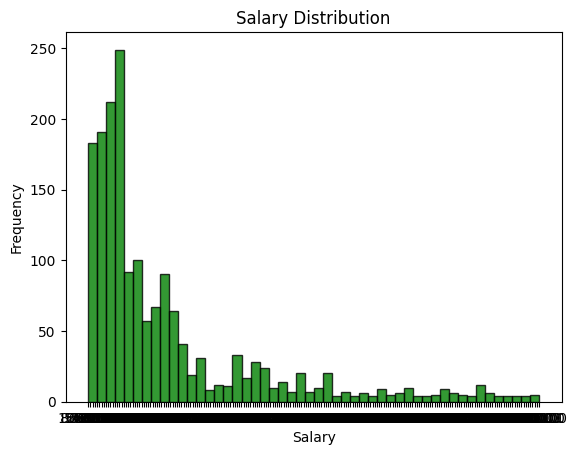

In [21]:
###################### draw the slary disripution ######################
plt.hist(df_salary['Salary'], bins=50, alpha=0.8, color='green', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

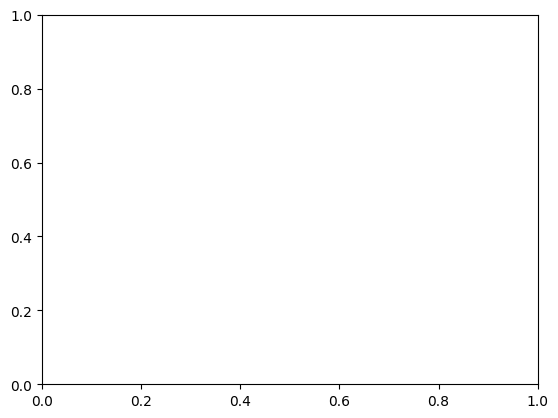

In [38]:
# create box plot
plt.boxplot(df_salary['Salary'],patch_artist=True,boxprops=dict(facecolor='blue', color='black'))
# set labels and title
plt.xlabel('Salary')
plt.ylabel('Value')
plt.title('Salary Box Plot')
# plt.ylim(0, 800000)
# show plot
plt.show()

statistic      value   
    mean     73765.974828
    median   70000.000000
    mode     70000.000000
    max      850000.000000
    min      10001.000000

#### Comments:
1. It seems from the data that the the average salary for IT jobs in general is around 70000 (above or below with 5000)
2. From the data also it seems that we have some outliers (the salary for some positions is above 200000) 

In [ ]:
######################## START EXPLORING sENIORITY LEVEL#################################

In [33]:
# CHECK THE NULLS IN SENIORITY LEVEL 
df_seniority = df.copy()
print(df_seniority['Seniority'].value_counts())
# clean Seniority Level 
'''
1- principal can be mapped to senior 
2- remove senior levels < 2
'''
def clean_senior_col(df):
    meaninigless_values = ['nan','student','working student','no idea, there are no ranges in the firm','no level','no level ']
    df = df[~df['Seniority'].isin(meaninigless_values)]
    for i, row in df.iterrows():
            if row['Seniority'] in ['principal']:
                df.at[i,'Seniority'] = 'senior'
    seniority_counts = df['Seniority'].value_counts()
    seniority_counts = seniority_counts[seniority_counts >= 2]
    df = df[df['Seniority'].isin(seniority_counts.index)]
    return df

Seniority
senior             944
middle             488
lead               163
junior              96
head                28
nan                 19
principal            5
no level             1
intern               1
working student      1
student              1
self employed        1
Name: count, dtype: int64


In [36]:

df_seniority = clean_senior_col(df_seniority)
seniority_remain_values = df_seniority['Seniority'].value_counts()

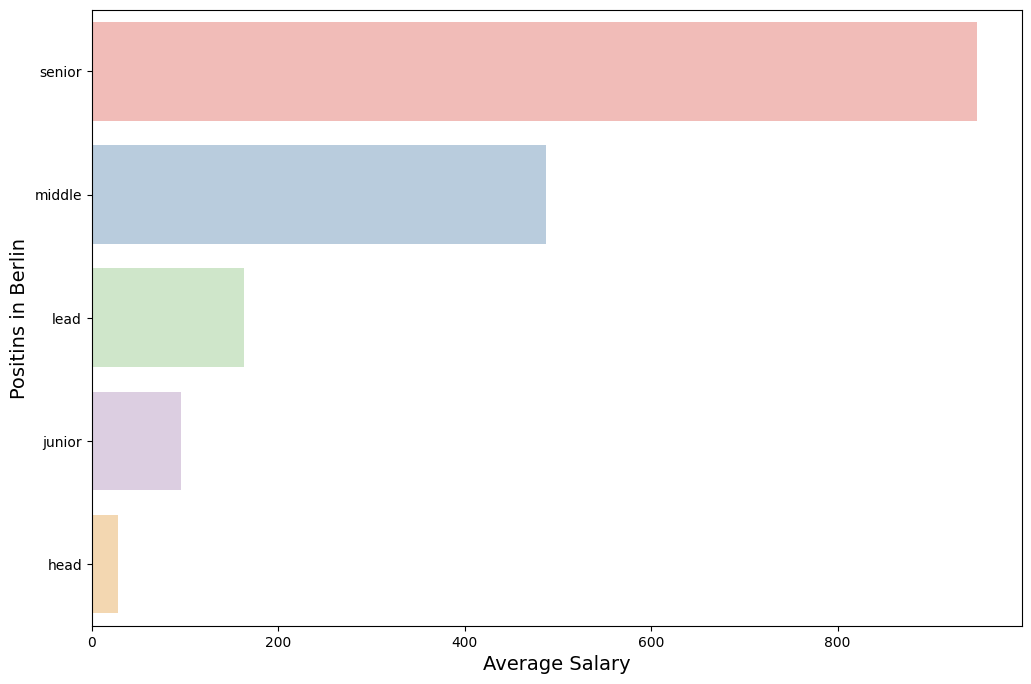

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(y=seniority_remain_values.index,x= seniority_remain_values,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Berlin",fontsize=14)
plt.show()

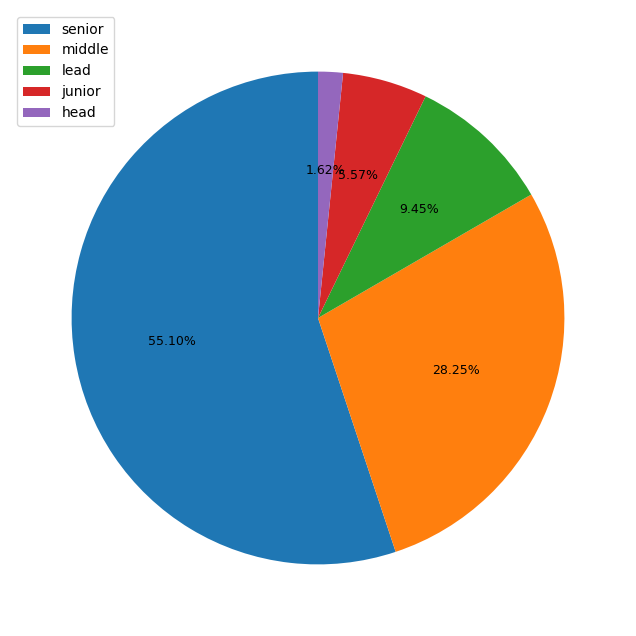

In [40]:
plt.figure(figsize=(8,8))
df_seniority['Seniority'].value_counts().iloc[:5].plot.pie(autopct="%1.2f%%",fontsize=9,startangle=90,labels=['']*5)
plt.ylabel("")
plt.legend(loc='upper left',labels=df['Seniority'].value_counts().iloc[:5].index)
plt.show()

#### Comments:
1. From the data it seems that the most frequent senior level is senior with precentage (55% around half of the data)

In [ ]:
######################## START EXPLORE SENIORS SALARIES IN BERLIN ONLY #######################

In [190]:
# get Berlin only 
df_Brlin = df.copy()
df_Brlin = df[df['City'] == 'berlin']

In [ ]:
################################# Salayries Juniors ########################################


In [131]:
# get seniors only
df_Brlin = df_Brlin[df_Brlin['Seniority'] == 'senior']

In [156]:
#TODO: this cell should be removed 
print(df_Brlin[df_Brlin['Position']=='nlp engineer'])

               Timestamp   Age Gender    City      Position Experience_Years   
284  24/11/2020 15:10:18  42.0   male  berlin  nlp engineer               20  \
298  24/11/2020 15:41:45  34.0   male  berlin  nlp engineer               12   
676  25/11/2020 18:59:36  33.0   male  berlin  nlp engineer               10   
850  27/11/2020 14:45:29  27.0   male  berlin  nlp engineer                5   
987  30/11/2020 19:28:15  34.0   male  berlin  nlp engineer                3   
453  04.12.2019 16:33:24  38.0   male  berlin  nlp engineer                4   

    Seniority Main_Tech   Salary Salary_Bonus Last_Year_Salary   
284    senior    python  80000.0          nan          66000.0  \
298    senior    python  90000.0          nan          80000.0   
676    senior       nan  90000.0          nan              nan   
850    senior    python  70000.0          nan              nan   
987    senior    python  70000.0          nan          55000.0   
453    senior    python  65000.0          n

In [ ]:
######################## GET AVG SALARIES IN BERLIN  #######################

In [148]:
# convert column 'Salary' to a numeric data type
df_Brlin['Salary'] = pd.to_numeric(df_Brlin['Salary'])
position_salary = df_Brlin.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_Brlin['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
researcher                   106000.000000
system administrator          96000.000000
sap consultant                96000.000000
machine learning engineer     94000.000000
software architect            91800.000000
frontend developer            90322.857143
data scientist                84235.869565
it manager                    82717.647059
data engineer                 81391.304348
data analyst                  80000.000000
sre                           79200.000000
nlp engineer                  77500.000000
software engineer             76599.494949
devops                        75592.307692
backend developer             75266.058442
product manager               73111.111111
business analyst              72000.000000
fullstack developer           71047.619048
mobile developer              70917.857143
embedded developer            66250.000000
qa                            66070.731707
designer (ui/ux)              58440.000000
dtype: float64


Position
backend developer            11590973.0
software engineer             7583350.0
data scientist                3874850.0
frontend developer            3793560.0
qa                            2708900.0
mobile developer              1985700.0
devops                        1965400.0
data engineer                 1872000.0
fullstack developer           1492000.0
it manager                    1406200.0
software architect            1101600.0
product manager                658000.0
designer (ui/ux)               584400.0
machine learning engineer      470000.0
nlp engineer                   465000.0
sre                            396000.0
embedded developer             265000.0
business analyst               216000.0
researcher                     212000.0
sap consultant                 192000.0
data analyst                   160000.0
system administrator            96000.0
Name: Salary, dtype: float64


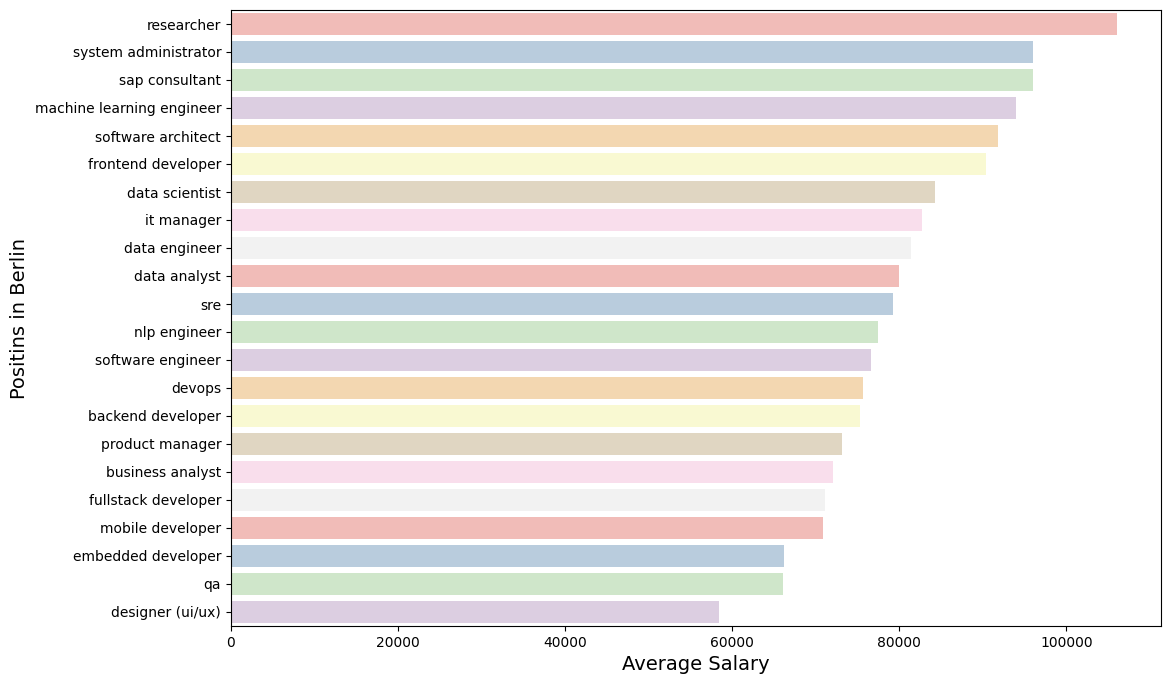

In [149]:
plt.figure(figsize=(12,8))
print(position_salary)
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Berlin",fontsize=14)
plt.show()

In [ ]:
#################################### END SALARY ANALYSIS IN BERLIN FOR SENIORS #################################

In [ ]:
######################## START EXPLORE SENIORS SALARIES IN MUNICH ONLY  #######################

In [170]:
# get Munich only 
df_Muinch = df.copy()
df_Muinch = df[df['City'] == 'munich']
# get seniors only
df_Muinch = df_Muinch[df_Muinch['Seniority'] == 'senior']


In [171]:
#TODO: this cell should be removed 
print(df_Muinch[df_Muinch['Position']=='researcher'])

               Timestamp   Age  Gender    City    Position Experience_Years   
236  02.12.2019 20:34:52  25.0  female  munich  researcher                5  \
292  03.12.2019 10:13:04  34.0    male  munich  researcher               12   
304  03.12.2019 10:39:01   nan    male  munich  researcher                9   

    Seniority Main_Tech    Salary Salary_Bonus Last_Year_Salary   
236    middle     c/c++   57000.0          nan              nan  \
292    senior     c/c++   90000.0      22500.0              nan   
304    senior    python  130000.0      18000.0              nan   

    Last_Year_Salary_Bonus Vacations Contract_Duration Main_Language_Work   
236                    nan      28.0         unlimited            english  \
292                    nan      30.0         unlimited            english   
304                    nan      30.0         unlimited            english   

    Company_Size         Company_Type  
236        1000+  consulting / agency  
292     100-1000         

In [155]:
######################## GET AVG SALARIES IN BERLIN  #######################
df_Muinch['Salary'] = pd.to_numeric(df_Muinch['Salary'])
position_salary = df_Muinch.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_Muinch['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
nlp engineer           140000.000000
researcher             110000.000000
software architect     103375.000000
sap consultant          97000.000000
data analyst            95000.000000
it manager              93333.333333
devops                  90545.454545
data scientist          89562.500000
backend developer       79348.979592
software engineer       78927.440000
fullstack developer     78308.333333
mobile developer        77056.250000
data engineer           74675.000000
embedded developer      73600.000000
sre                     73433.333333
qa                      73410.714286
business analyst        71500.000000
frontend developer      71004.545455
product manager         69500.000000
designer (ui/ux)        65000.000000
dtype: float64


Position
software engineer      3946372.0
backend developer      3888100.0
qa                     2055500.0
frontend developer     1562100.0
mobile developer       1232900.0
it manager             1120000.0
devops                  996000.0
fullstack developer     939700.0
software architect      827000.0
data scientist          716500.0
embedded developer      368000.0
data engineer           298700.0
sap consultant          291000.0
business analyst        286000.0
nlp engineer            280000.0
sre                     220300.0
researcher              220000.0
product manager         139000.0
designer (ui/ux)        130000.0
data analyst             95000.0
Name: Salary, dtype: float64


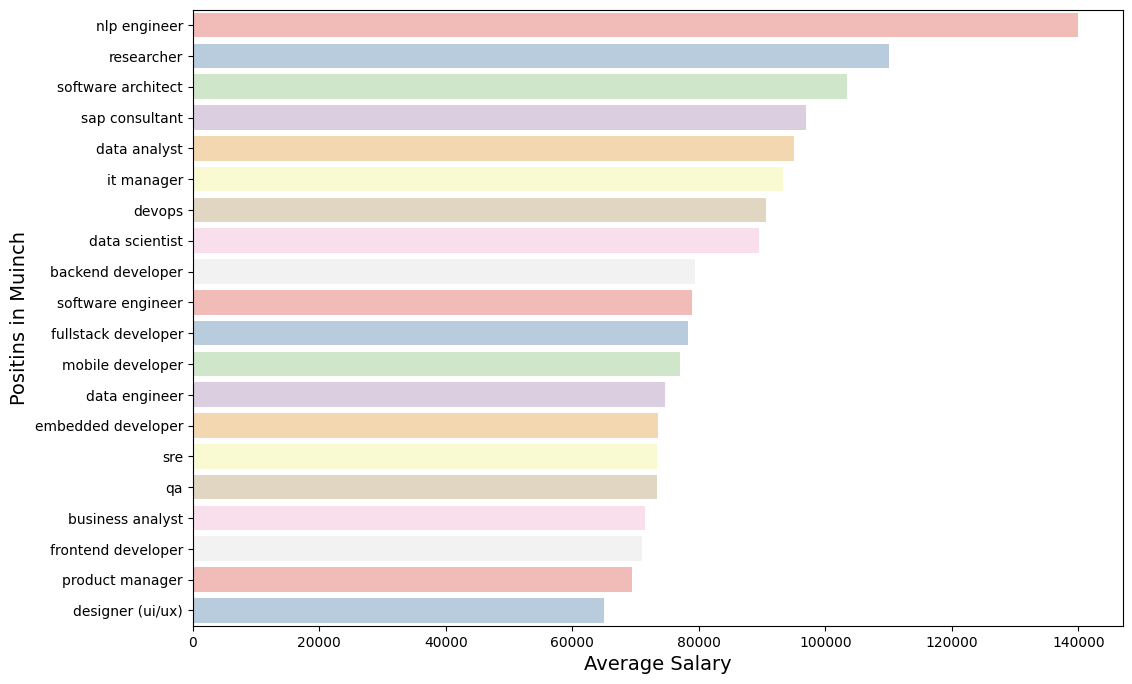

In [160]:
######################## Plot #######################
plt.figure(figsize=(12,8))
print(position_salary)
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Muinch",fontsize=14)
plt.show()

In [ ]:
######################################## GET AVG SALARIES IN amsterdam ##################################


In [174]:
# get Munich only 
df_amsterdam = df.copy()
df_amsterdam = df[df['City'] == 'hamburg']
# get seniors only
# df_amsterdam = df_amsterdam[df_amsterdam['Seniority'] == 'senior']


In [175]:
#TODO: this cell should be removed 
print(df_amsterdam[df_amsterdam['Position']=='researcher'])

Empty DataFrame
Columns: [Timestamp, Age, Gender, City, Position, Experience_Years, Seniority, Main_Tech, Salary, Salary_Bonus, Last_Year_Salary, Last_Year_Salary_Bonus, Vacations, Contract_Duration, Main_Language_Work, Company_Size, Company_Type]
Index: []


In [168]:
######################## GET AVG SALARIES IN BERLIN  #######################
df_amsterdam['Salary'] = pd.to_numeric(df_amsterdam['Salary'])
position_salary = df_amsterdam.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_amsterdam['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
sre                          107685.000000
machine learning engineer     90500.000000
sap consultant                80500.000000
data engineer                 79800.000000
data scientist                79000.000000
devops                        78950.000000
fullstack developer           77500.000000
it manager                    77333.333333
business analyst              74900.000000
frontend developer            74900.000000
backend developer             74892.857143
mobile developer              74200.000000
qa                            69428.571429
dtype: float64


Position
backend developer            1048500.0
qa                            486000.0
mobile developer              371000.0
devops                        315800.0
data engineer                 239400.0
it manager                    232000.0
frontend developer            224700.0
machine learning engineer     181000.0
data scientist                158000.0
fullstack developer           155000.0
sre                           107685.0
sap consultant                 80500.0
business analyst               74900.0
Name: Salary, dtype: float64


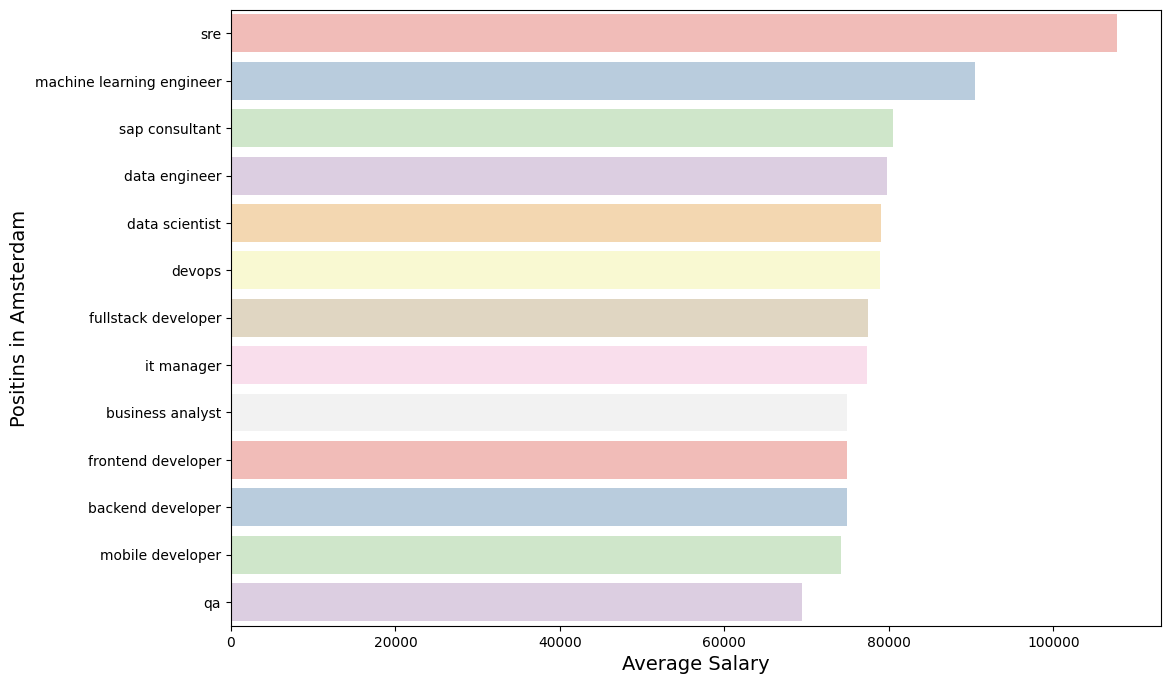

In [169]:
######################## Plot #######################
plt.figure(figsize=(12,8))
print(position_salary)
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Amsterdam",fontsize=14)
plt.show()

#### 1- Stating and refining the question.
##### Can we infer that the most paying position in Berlin is the highest paid in all other cities?  

#### 2- Exploring the data.

In [107]:
# Explor Positions in Berlin
df_Mu_pos = df.copy()
df_Mu_pos = df_Mu_pos[df_Mu_pos['City']=='Munich']
# find the distribution between the position and avg Salary

In [110]:
# df_Mu_pos[df_Mu_pos['Salary']==300000.0]

,Timestamp,Age,Gender,City,Position,Experience_Years,German_Experience,Seniority,Main_Tech,Other_Tech,Salary,Last_Year_Salary,Employee_Status,Contract_Duration,Main_Language_Work,Company_Size,Company_Type
576,25/11/2020 13:26:21,24.0,Male,Munich,Data Scientist,1,1,Junior,C++,"Python, C/C++, Swift, Java / Scala, R, SQL, Go...",300000.0,NaN,Full-time employee,NaN,English,101-1000,Startup


In [ ]:
# remove all values that appear little in company type 
company_remain_values = ['Product','Startup','Consulting / Agency','Bank','Media']
df =df.loc[df['Company_Type'].isin(company_remain_values)]

#### 3- Format Modeling to answer the question 

#### 4- Interpreting the results. 

#### 5- Communicating the results.